<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_p2_transformacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# encoding and transformation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# apagar????????
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder

#from sklearn.decomposition import PCA

#from sklearn.metrics import confusion_matrix


In [ ]:
data_src = pd.read_pickle('alemPena-p1.pickle')


## changing binary columns to numeric values


In [ ]:
data_src.replace({'GeneroReu':{'M':0,'F':1}}, inplace=True)

data_src.replace({'Reclusao':{'N':0,'S':1}},inplace=True)
data_src.replace({'Detencao':{'N':0,'S':1}},inplace=True)
data_src.replace({'Multa':{'N':0,'S':1}},inplace=True)
data_src.replace({'CulpabCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'AntecedCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'CondSocialCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'PersonCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'MotivosCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'CircCrimeCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'ConseqCrimeCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'ComportVitimaCirc':{'N':0,'S':1}},inplace=True)
data_src.replace({'CircReincidencia':{'N':0,'S':1}},inplace=True)
data_src.replace({'PenaMinLegal':{'N':0,'S':1}},inplace=True)

## standardisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

data_src['Ano-norm'] = scaler.fit_transform(data_src[['Ano']])
data_src['ReclusaoDias-norm'] = scaler.fit_transform(data_src[['ReclusaoDias']])
data_src['MultaDias-norm'] = scaler.fit_transform(data_src[['MultaDias']])
data_src['DetencaoDias-norm'] = scaler.fit_transform(data_src[['DetencaoDias']])

In [ ]:
data_src.drop(columns=['Ano','ReclusaoDias','MultaDias','DetencaoDias'], inplace=True)

## categorical attributes

In [ ]:

data_src = pd.get_dummies(data_src, columns=['RegimeInicial'],prefix='RI')
data_src = pd.get_dummies(data_src, columns=['TipoPenalGenerico'],prefix='TP')

In [ ]:
#condicao importante antes de rodar os métodos de agrupamento: todos os campos numéricos e preenchidos (sem nulos)
pd.options.display.max_rows=35
data_src.isnull().sum()

GeneroReu             0
Reclusao              0
Detencao              0
Multa                 0
CulpabCirc            0
AntecedCirc           0
CondSocialCirc        0
PersonCirc            0
MotivosCirc           0
CircCrimeCirc         0
ConseqCrimeCirc       0
ComportVitimaCirc     0
CircReincidencia      0
PenaMinLegal          0
Ano-norm              0
ReclusaoDias-norm     0
MultaDias-norm        0
DetencaoDias-norm     0
RI_Aberto             0
RI_Fechado            0
RI_Semi-Aberto        0
TP_ArmasFogo          0
TP_CP-adminPublico    0
TP_CP-liberdade       0
TP_CP-outros          0
TP_CP-patrimonio      0
TP_CP-pessoa          0
TP_Drogas             0
TP_Outros             0
TP_Transito           0
dtype: int64

In [ ]:
data_src.shape

(606, 30)

## estatisticals

In [ ]:
data_src.describe().T

,count,mean,std,min,25%,50%,75%,max
GeneroReu,606.0,0.066007,0.248499,0.0,0.000000,0.000000,0.000000,1.0
Reclusao,606.0,0.867987,0.338785,0.0,1.000000,1.000000,1.000000,1.0
Detencao,606.0,0.161716,0.368494,0.0,0.000000,0.000000,0.000000,1.0
Multa,606.0,0.834983,0.371502,0.0,1.000000,1.000000,1.000000,1.0
CulpabCirc,606.0,0.348185,0.476789,0.0,0.000000,0.000000,1.000000,1.0
AntecedCirc,606.0,0.156766,0.363880,0.0,0.000000,0.000000,0.000000,1.0
CondSocialCirc,606.0,0.171617,0.377359,0.0,0.000000,0.000000,0.000000,1.0
PersonCirc,606.0,0.120462,0.325770,0.0,0.000000,0.000000,0.000000,1.0
MotivosCirc,606.0,0.153465,0.360733,0.0,0.000000,0.000000,0.000000,1.0
CircCrimeCirc,606.0,0.234323,0.423925,0.0,0.000000,0.000000,0.000000,1.0


Os atributos que possuem valores binários, com maioria de 0's, a média denuncia por apresentar valores mais baixos (como GeneroReu, Detencao, AntecedCirc, CP-AdminPublico, CP-Liberado e CP-Outros que possuem valores na ordem 2 casas decimais negativas). Já em relação ao desvio padrão, a variação baixa indica que houve variação pequena entre os valores, observação desejada dada a aplicação de normalização MinMax antes de submter aos algoritmos de agrupamento.

In [ ]:
crime_type = "TP_ArmasFogo"
group_typeXgenre = data_src.groupby(["GeneroReu", crime_type])[crime_type].count()

In [ ]:
group_typeXgenre

GeneroReu  TP_ArmasFogo
0          0               470
           1                96
1          0                38
           1                 2
Name: TP_ArmasFogo, dtype: int64

In [ ]:
compare = "RI_Semi-Aberto"
group_fieldXgenre = data_src.groupby(["GeneroReu", compare])[compare].count()

In [ ]:
group_fieldXgenre

GeneroReu  RI_Semi-Aberto
0          0                 415
           1                 151
1          0                  34
           1                   6
Name: RI_Semi-Aberto, dtype: int64

In [ ]:
 import seaborn as sns

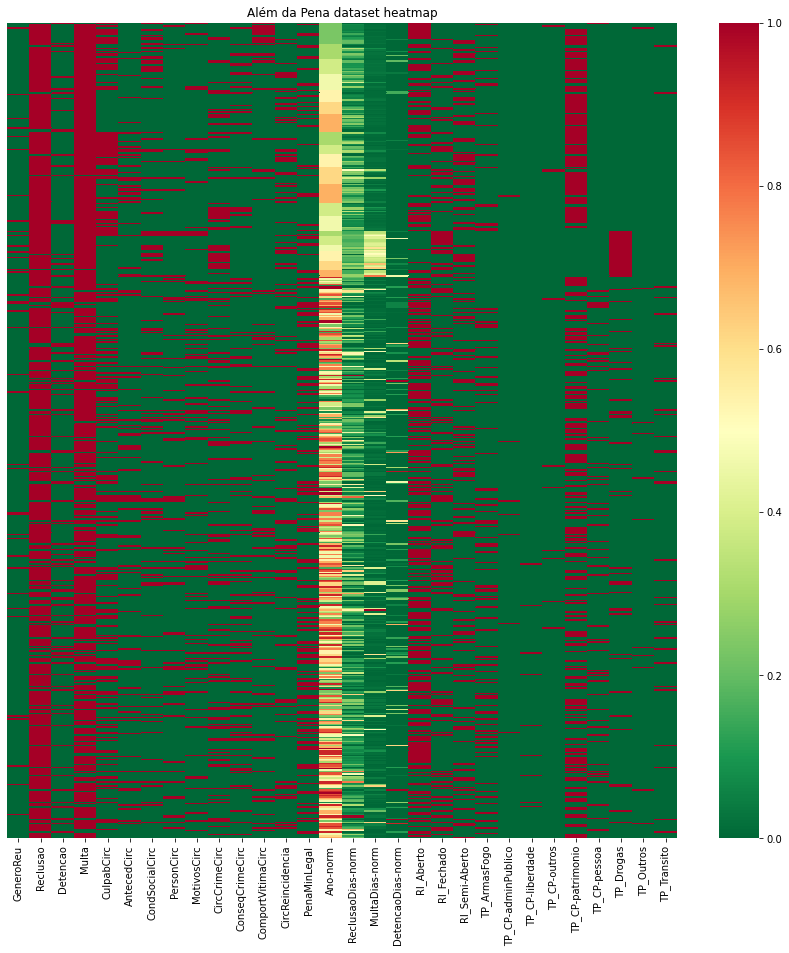

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Além da Pena dataset heatmap')
sns.heatmap(data_src, annot=False, yticklabels=False, cmap='RdYlGn_r')
#plt.savefig('heatmap.png', dpi=100)

O mapa de calor apresenta os dados em análise sob a perspectiva dos valores que poderão influenciar na criação dos agrupamentos, cada coluna representa um dos atributos em análise e as observações estão dispostas nas linhas, em tonalidades que, aproximadas da cor verde indicam valores medidos e próximos de 0, os tons de amarelo vão indicando valores próximos de 0.5 e, próximo de vermelho, 1.

Podemos observar que a maior variação de valores existe claramente no atributo Ano, seguido pelos atributos ReclusaoDias, MultaDias e DetencaoDias. Os demais atributos estão majoritariamente com valor 0, enquanto alguns deles se destacam por possuirem muitas amostras com valor 1 (Reclusao, Multa, RegimeInicialAberto e CP-Patrimonio). Essas informações visuais nos permitem identificar o desbalanceamento originário dos dados em análise e antever o impacto de enviesamento indesejado na análise..

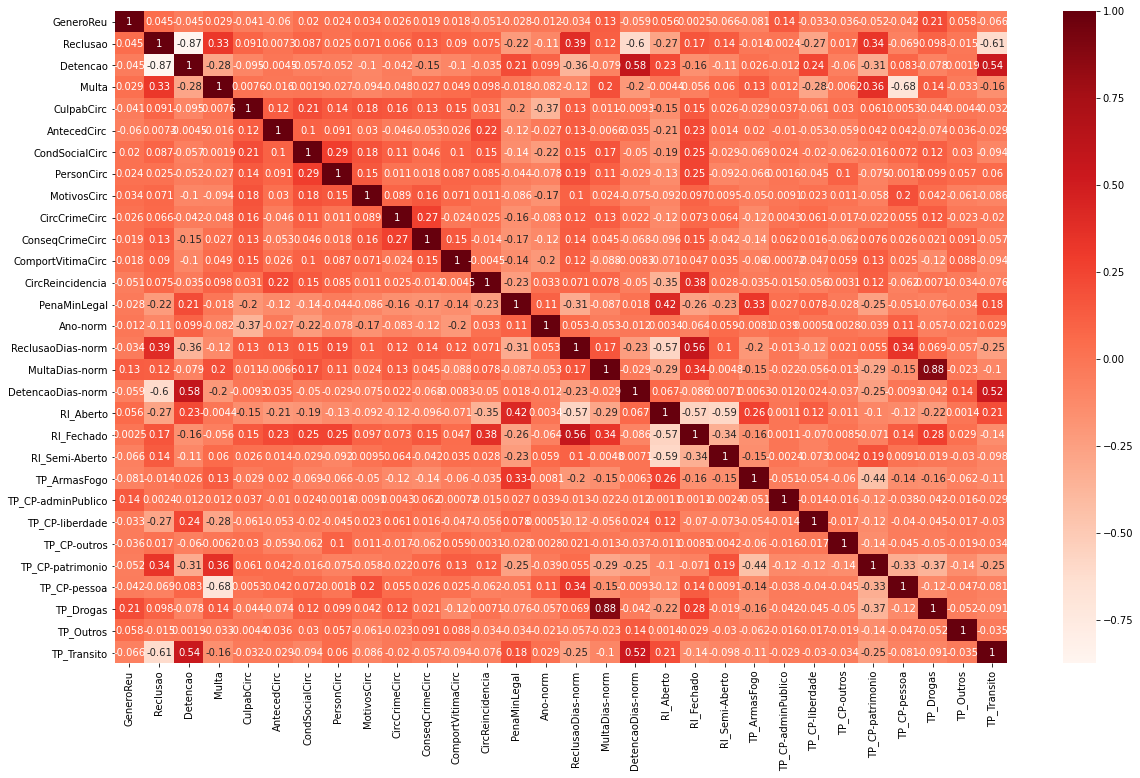

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,12))
corrMatrix = data_src.corr()
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# closing data to p2


In [ ]:
data_src.to_pickle('alemPena-p2.pickle')